위키북스 '데이터 분석가가 반드시 알아야 할 모든 것'의 실습 필사입니다.

# 10.5.1 분포 시각화

- 분포 시각화는 연속형과 같은 양적 척도인지, 명목형과 같은 질적 척도인지에 따라 구분해서 그린다.
- 양적 척도: 막대 그래프, 선 그래프, 히스토그램
- 질적 척도: 파이 차트, 도넛 차트, 트리맵 차트, 와플 차트
    - 트리맵 차트: 하나의 큰 사각형을 구성 요소의 비율에 따라 작은 사각형으로 쪼개어 분포를 표현.
                   사각형 안에 더 작은 사각형을 포함시켜 위계구조를 표현할 수 있다.
                   한정된 공간 안에서 많은 구성 요소들의 분포를 체계적으로 표현할 수 있다.
- 트리맵과 유사한 와플 차트는 일정한 네모 조각들로 분포를 표현하지만, 트리맵처럼 위계 구조를 표현하지는 못 한다.

In [2]:
!pip install pywaffle

     ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
      --------------------------------------- 0.6/25.2 MB 17.8 MB/s eta 0:00:02
     - -------------------------------------- 1.0/25.2 MB 13.1 MB/s eta 0:00:02
     -- ------------------------------------- 1.5/25.2 MB 12.0 MB/s eta 0:00:02
     --- ------------------------------------ 2.0/25.2 MB 11.5 MB/s eta 0:00:03
     --- ------------------------------------ 2.5/25.2 MB 11.2 MB/s eta 0:00:03
     ---- ----------------------------------- 2.8/25.2 MB 9.9 MB/s eta 0:00:03
     ----- ---------------------------------- 3.3/25.2 MB 10.6 MB/s eta 0:00:03
     ----- ---------------------------------- 3.8/25.2 MB 10.4 MB/s eta 0:00:03
     ------ --------------------------------- 4.2/25.2 MB 10.3 MB/s eta 0:00:03
     ------ --------------------------------- 4.2/25.2 MB 10.3 MB/s eta 0:00:03
     ------ --------------------------------- 4.2/25.2 MB 10.3 MB/s eta 0:00:03
     ------ --------------------------------- 4.2

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from pywaffle import Waffle

In [4]:
df = pd.read_csv('datasets/six_countries_height_samples.csv')
df.head()

,id,country,sex,height_cm
0,rhop00001,AUSTRALIA,man,189
1,rhop00002,AUSTRALIA,man,165
2,rhop00003,AUSTRALIA,man,189
3,rhop00004,AUSTRALIA,man,164
4,rhop00005,AUSTRALIA,man,192


## 히스토그램 시각화

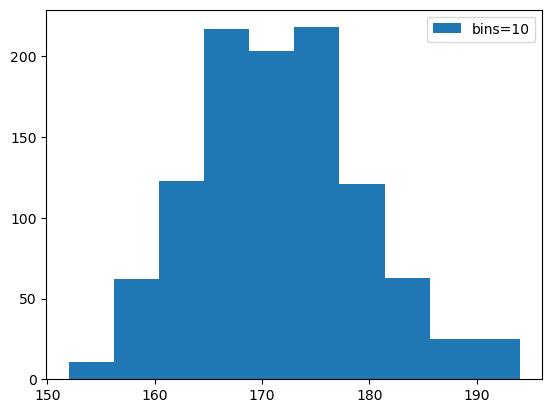

In [6]:
df1 = df[['height_cm']]

# 10cm 단위로 히스토그램 시각화
plt.hist(df1, bins=10, label='bins=10')
plt.legend()
plt.show()

# 정규 분포와 유사한 형태의 그래프
# 봉우리가 2개인 것은 여성과 남성의 신장 분포가 다르기 때문으로 판단된다.

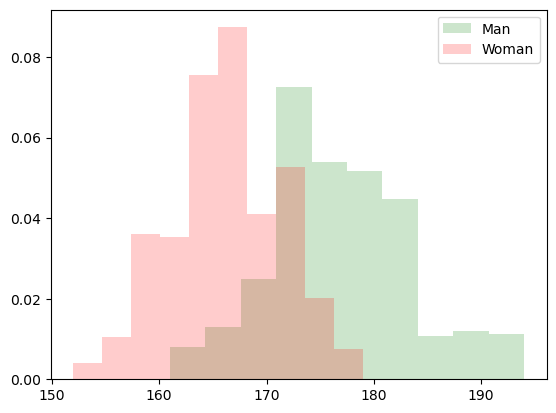

In [17]:
df1_1 = df[df['sex'].isin(['man'])]
df1_1 = df1_1[['height_cm']]
df1_2 = df[df['sex'].isin(['woman'])]
df1_2 = df1_2[['height_cm']]

# 10cm 단위로 여성, 남성 신장 히스토그램 시각화
# alpha: 그래프 색상 불투명도, density: 그래프 표현 여부
plt.hist(df1_1, color='green', alpha=0.2, bins=10, label='Man', density=True)
plt.hist(df1_2, color='red', alpha=0.2, bins=10, label='Woman', density=True)
plt.legend()
plt.show()

## 파이 차트, 도넛 차트 시각화

In [19]:
df2 = df[['country', 'height_cm']]
df2 = df2[df.height_cm >= 175]
df2 = df2.groupby('country').count().reset_index()
df2.head()

,country,height_cm
0,AUSTRALIA,68
1,DENMARK,59
2,ITALY,67
3,JAPAN,46
4,KOREA,52


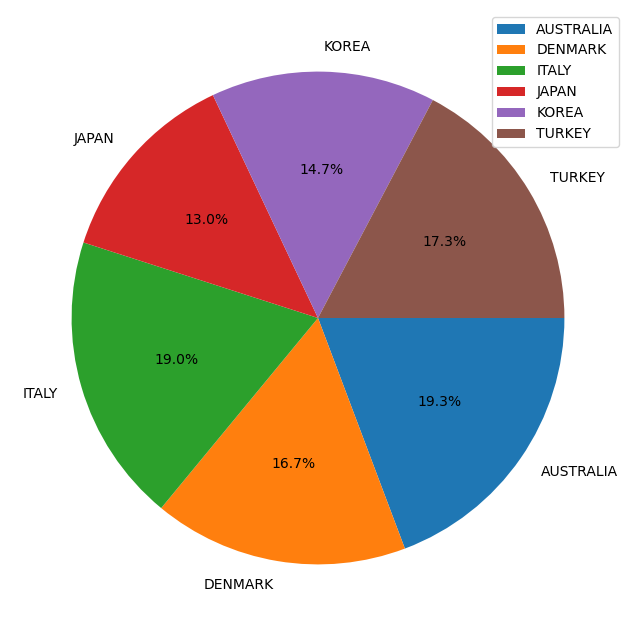

In [20]:
fig = plt.figure(figsize=(8, 8)) # 캔버스 생성
fig.set_facecolor('white') # 캔버스 배경색
ax = fig.add_subplot() # 프레임 생성

# 파이 차트 출력
# startangle: 시작점 degree 설정, counterclock=False: 시계 방향
ax.pie(df2.height_cm, labels=df2.country, startangle=0, counterclock=False, 
       autopct=lambda p : '{:.1f}%'.format(p) # 퍼센트 자리수 설정
      )
plt.legend()
plt.show()

# 키 175 이상인 샘플 수 비율

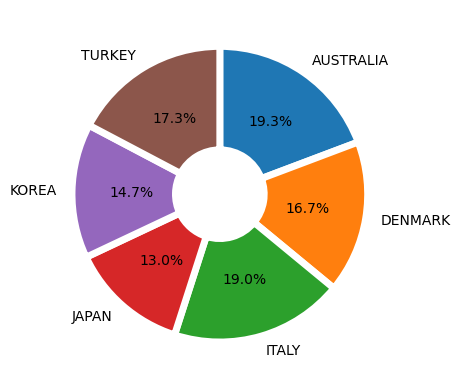

In [23]:
# 도넛 차트 시각화

# 차트 형태 옵션 설정
wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':5}
plt.pie(df2.height_cm, labels=df2.country, autopct='%.1f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops)
plt.show()

## 트리맵 시각화

In [25]:
df3 = df[['country', 'sex', 'height_cm']]
df3 = df3[df.height_cm >= 175]
df3 = df3.groupby(['country', 'sex']).count().reset_index()
df3.head(10)

,country,sex,height_cm
0,AUSTRALIA,man,59
1,AUSTRALIA,woman,9
2,DENMARK,man,53
3,DENMARK,woman,6
4,ITALY,man,60
5,ITALY,woman,7
6,JAPAN,man,45
7,JAPAN,woman,1
8,KOREA,man,50
9,KOREA,woman,2


In [30]:
fig = px.treemap(df3, path=['sex', 'country'], values='height_cm', color='height_cm', color_continuous_scale='viridis')
fig.show()

# 트리맵은 위계구조로 표현하기 때문에 path를 통해 위계구조 순서별 컬럼을 넣어준다. (1. 성별, 2. 국가)
# 남성-이탈리아의 비중이 가장 높고, 여성-일본의 비중이 가장 낮다.

## 와플 차트 시각화

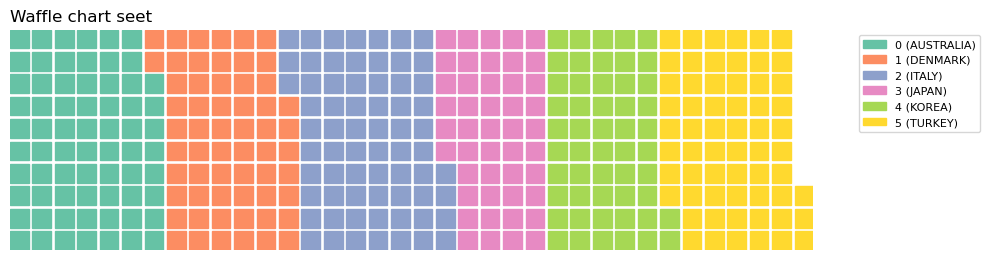

In [29]:
fig = plt.figure(
        FigureClass=Waffle,
        plots={
            111: {
                'values': df2['height_cm'],
                'labels': ["{0} ({1})".format(n, v) for n, v in df2['country'].items()],
                'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
                'title': {'label': 'Waffle chart seet', 'loc': 'left'}
                
            }
        },
    rows=10, figsize=(10, 10))


# 국가의 비중이 작은 정사각형으로 표현된다. 
# rows를 통해 차트 형태를 조정할 수 있다.